In [1]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

In [2]:
wstETH_cbETH_2_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / 'daily_snapshots/0x8e85e97ed19C0fa13B2549309965291fbbc0048b_apr_df.csv',
    index_col=0,
    parse_dates=True,
)

wstETH_cbETH_2_apr_df 

,block,tokens,balances,lastChangeBlock,lp_token_virtual_price,lp_token_total_supply,protocol_swap_fee_percent,pool_balance_0,pool_balance_2,pool_balance_3,...,pool_balance_equilibrium_portion_0,pool_balance_equilibrium_portion_2,pool_balance_equilibrium_portion_3,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,pool_address
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2022-01-03,NaN,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2022-01-04,NaN,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2022-01-05,NaN,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2022-01-06,NaN,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,17346692.0,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",['8472546753055917496' '2596148429267421127339...,17327244.0,1.029409,27.798162,0.5,8.472547,9.409728,8.660431,...,0.333231,0.342443,0.324326,1.029781,-0.030765,2.450676,0.0,167.830919,0.030765,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2023-05-28,17353818.0,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",['8472546753055917496' '2596148429267421127339...,17327244.0,1.029409,27.798162,0.5,8.472547,9.409728,8.660431,...,0.333237,0.342447,0.324316,1.029906,0.044840,2.208364,0.0,168.105285,-0.044840,0x8e85e97ed19C0fa13B2549309965291fbbc0048b
2023-05-29,17360948.0,"['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',...",['8472546753055917496' '2596148429267421127339...,17327244.0,1.029409,27.798162,0.5,8.472547,9.409728,8.660431,...,0.333231,0.342447,0.324321,1.030044,0.071687,2.287353,0.0,168.737313,-0.071687,0x8e85e97ed19C0fa13B2549309965291fbbc0048b


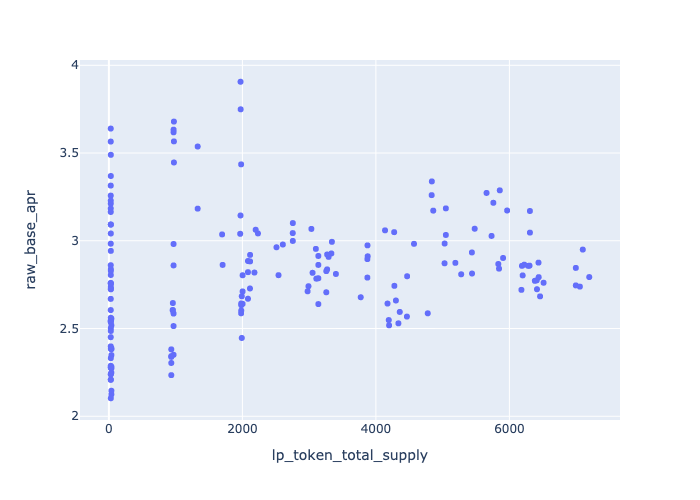

In [3]:
px.scatter(wstETH_cbETH_2_apr_df, x='lp_token_total_supply', y='raw_base_apr')

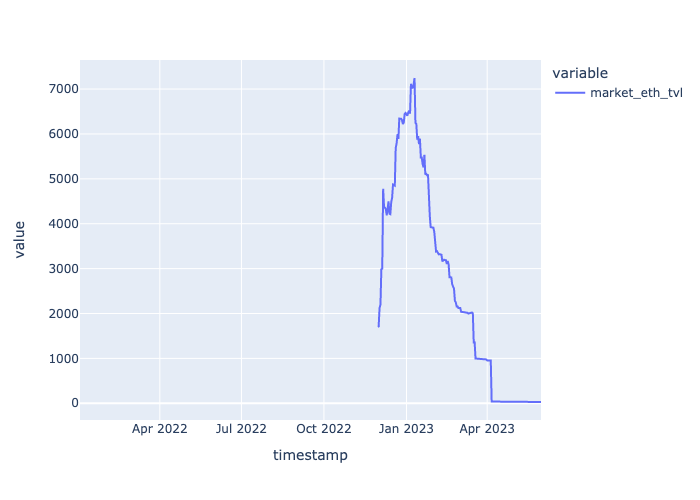

In [4]:
px.line(wstETH_cbETH_2_apr_df['market_eth_tvl'])

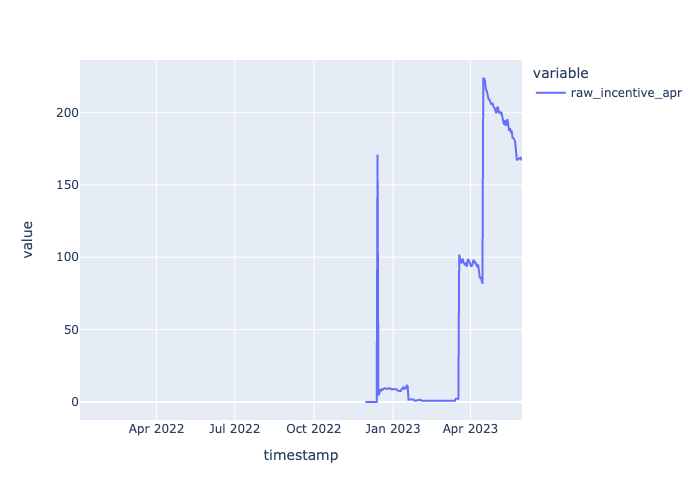

In [5]:
px.line(wstETH_cbETH_2_apr_df['raw_incentive_apr'])

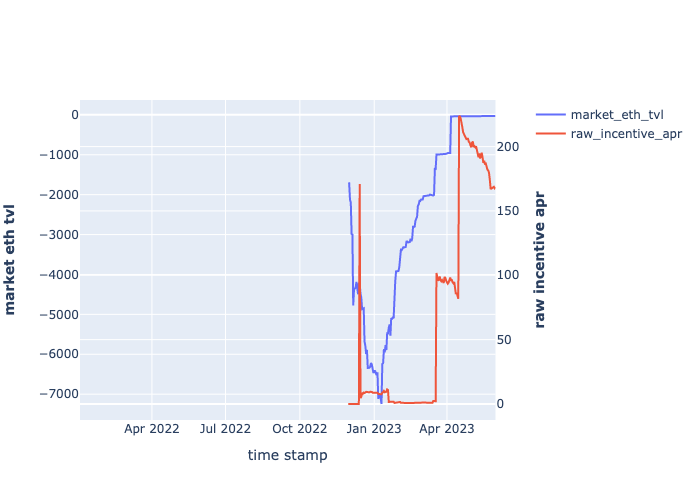

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=wstETH_cbETH_2_apr_df.index, y=-wstETH_cbETH_2_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=wstETH_cbETH_2_apr_df.index, y=wstETH_cbETH_2_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)

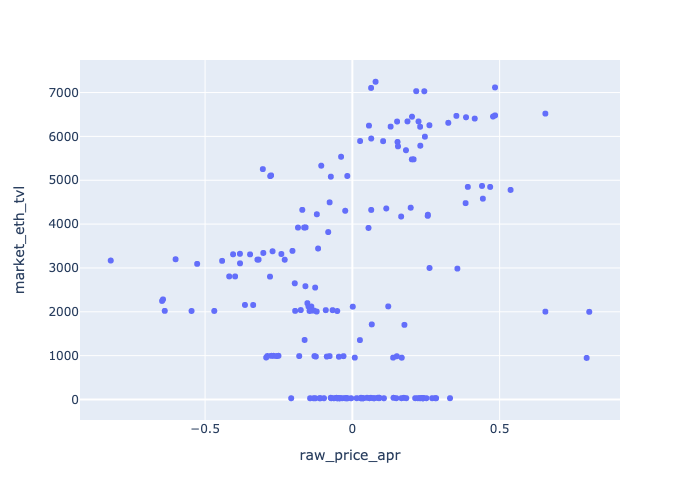

In [7]:
px.scatter(wstETH_cbETH_2_apr_df, x='raw_price_apr', y='market_eth_tvl')

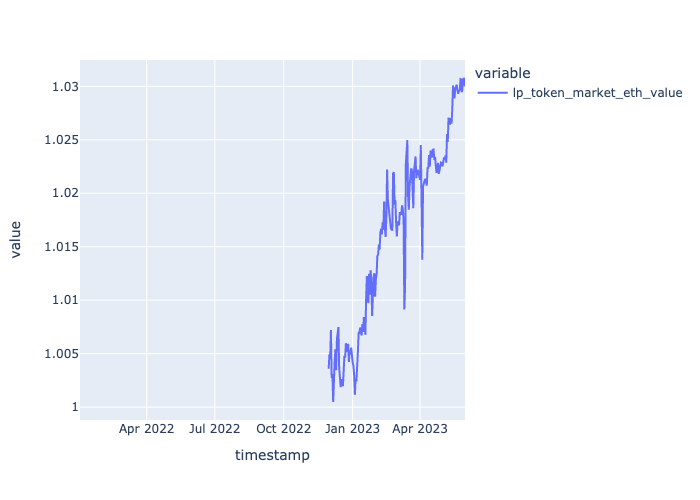

In [8]:
px.line(wstETH_cbETH_2_apr_df['lp_token_market_eth_value'])